# 1. Data Exploration

In [3]:
import pandas as pd

# Step 1: Load the datasets
titanic_train = pd.read_csv('/content/Titanic_train.csv') #Training data
titanic_test = pd.read_csv('/content/Titanic_test.csv') #Test data

# Step 2: Calculate the mean of the 'survived' column in the training dataset
mean_survived = titanic_train['Survived'].mean()

# Step 3: Create the 'survived' column in the test dataset and fill it with the mean
titanic_test['survived'] = mean_survived

# Step 4: Merge the datasets
merged_data = pd.concat([titanic_train, titanic_test], ignore_index=True)

# Display the merged dataset
print(merged_data.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  survived  
0      0         A/5 21171   7.2500   NaN        S       NaN  
1      0          PC 17599  71.2833   C85        C       NaN  
2      0  STON/O2. 3101282   7.9250   NaN        S       NaN  
3      0            113803  53.1000  C123        S       NaN  
4    

In [7]:
merged_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.383838
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0.383838
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.383838
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.383838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  survived     418 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 133.1+ KB
None

Summary Statistics
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.3838

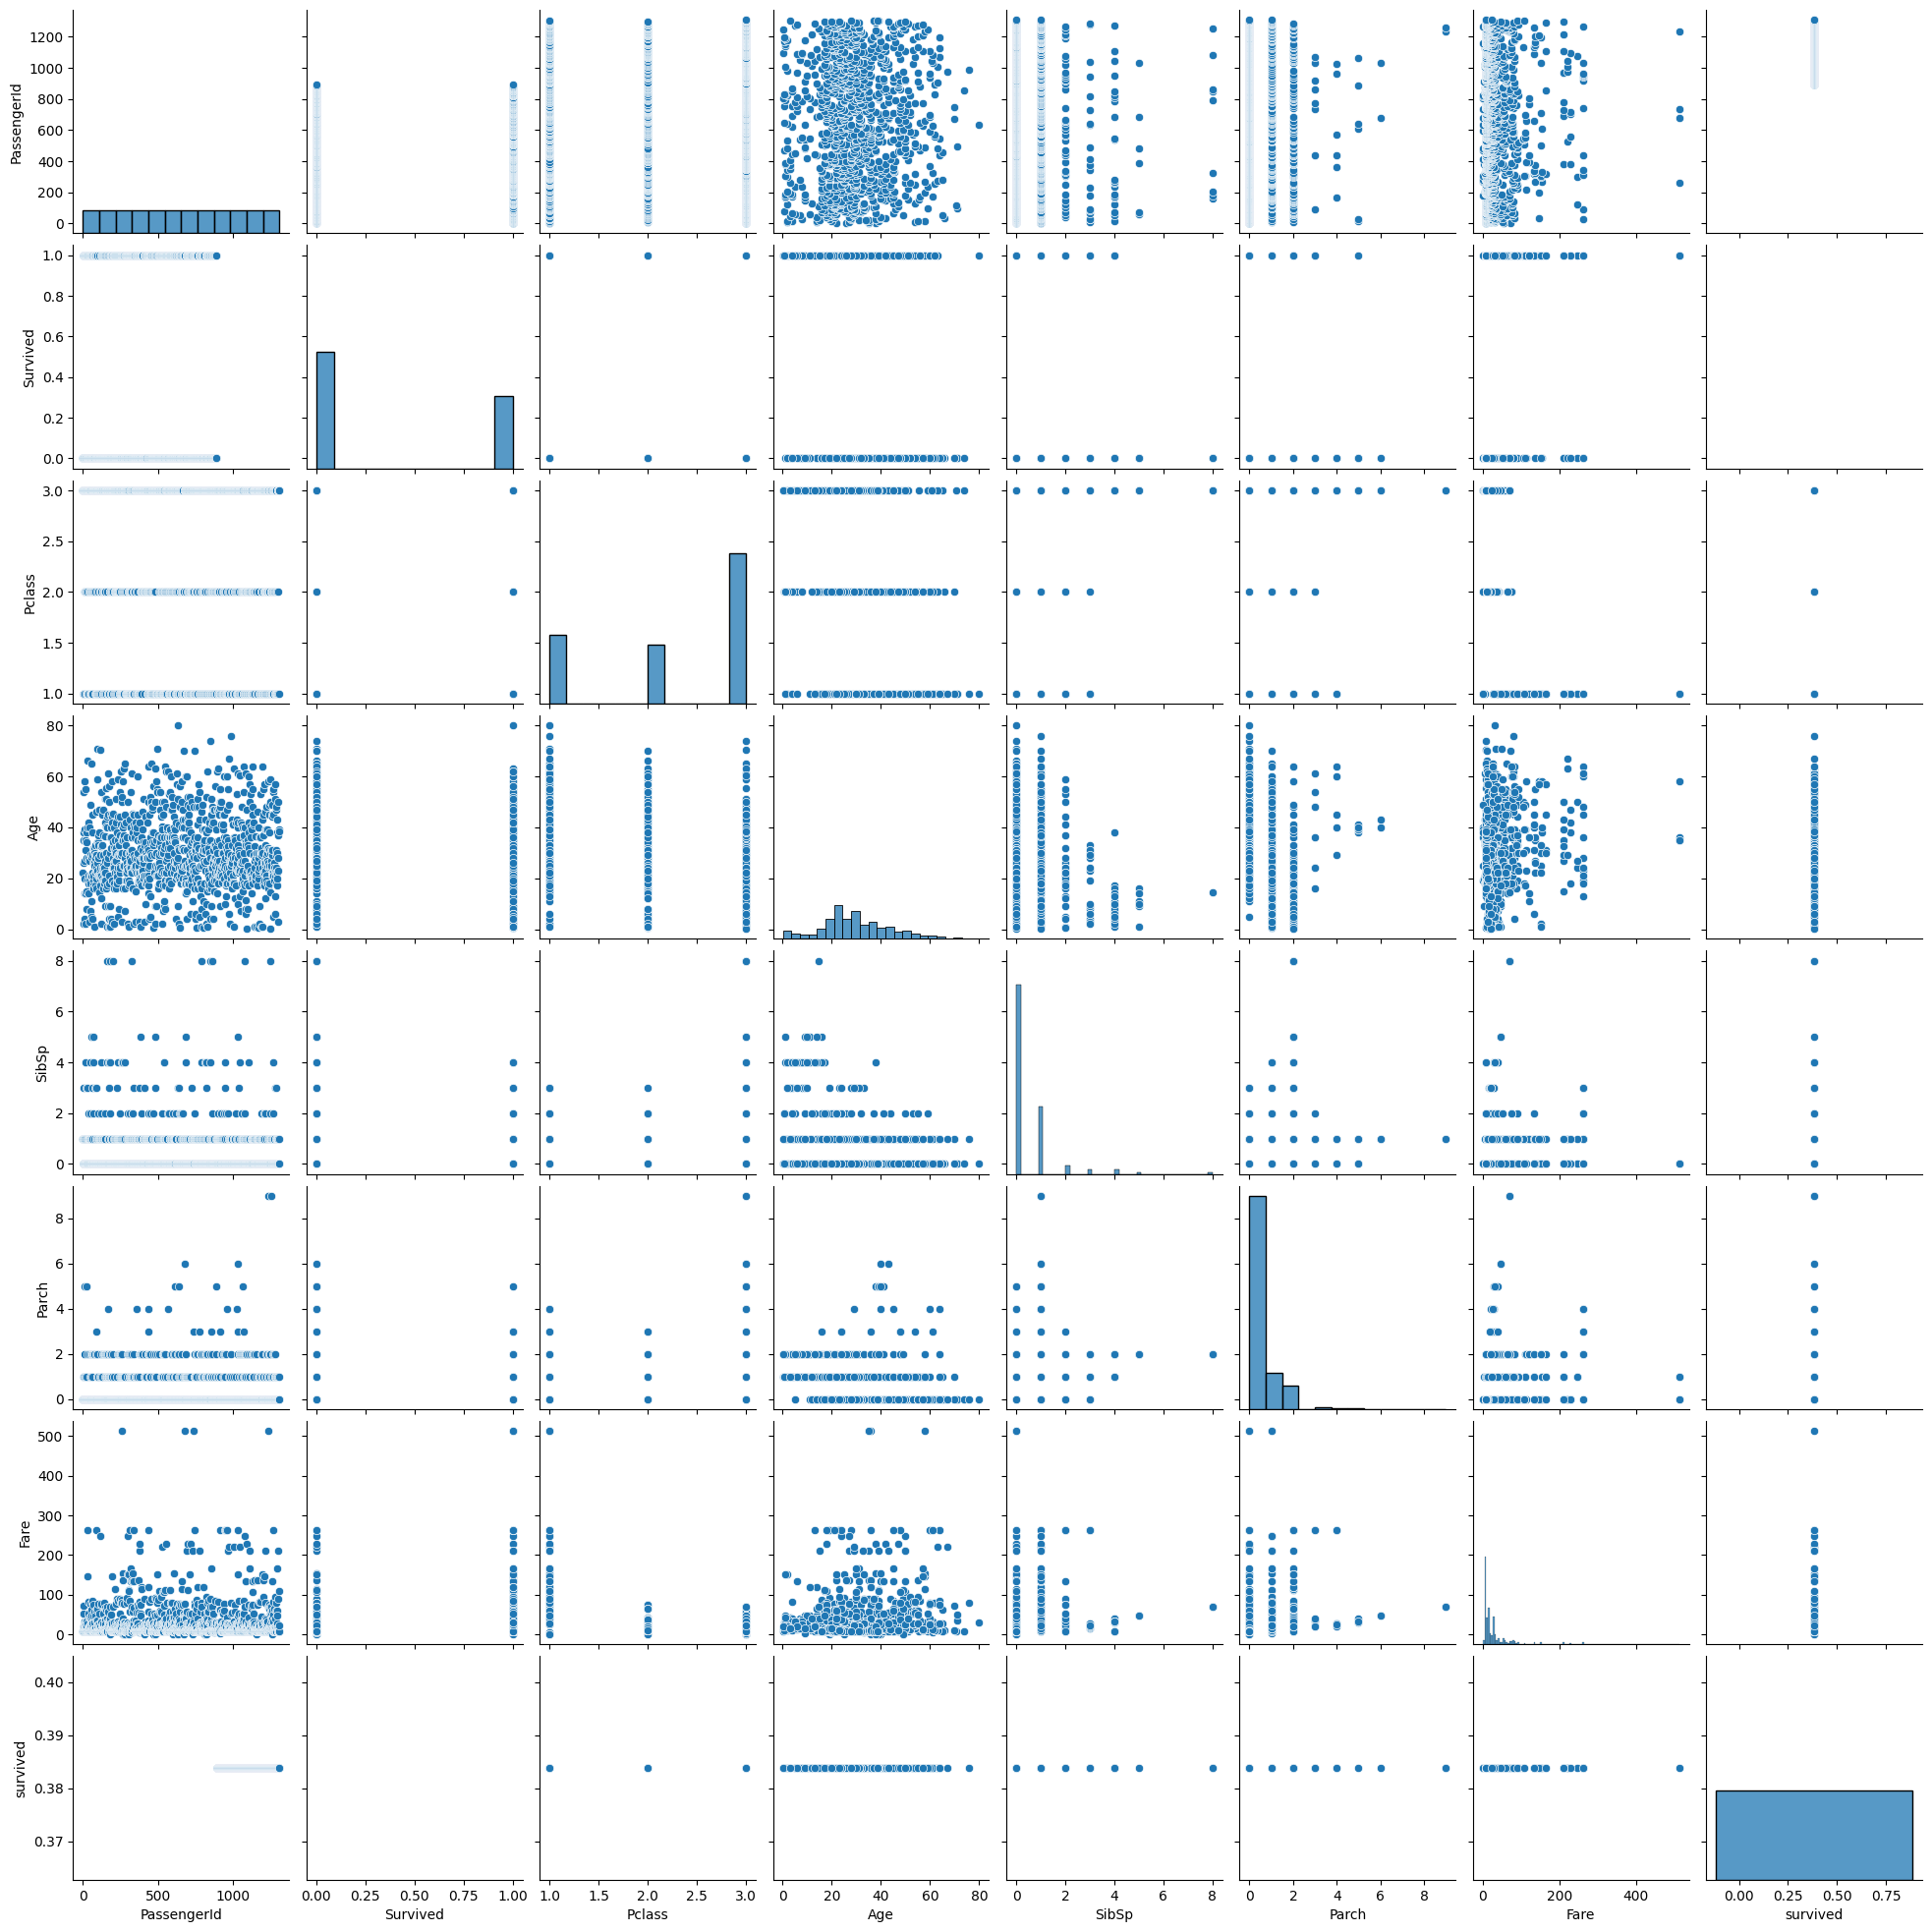

In [8]:
# Examine the features, their types, and summary statistics
print(merged_data.info())
print("\nSummary Statistics")
print(merged_data.describe())

# Create visualizations such as histograms, box plots, or pair plots
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(merged_data)
plt.show()

# 2. Data Preprocessing

In [9]:
#Checking Null values
merged_data.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [10]:
#Separating numerical and categorical columsn from dataset
num_cols = [col for col in merged_data.columns if merged_data[col].dtype != 'O']
cat_cols = [col for col in merged_data.columns if merged_data[col].dtype == 'O']

In [12]:
from sklearn.impute import SimpleImputer
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder


# Create a SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create a SimpleImputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the SimpleImputer to numerical columns
merged_data[num_cols] = num_imputer.fit_transform(merged_data[num_cols])

# Apply the SimpleImputer to categorical columns
merged_data[cat_cols] = cat_imputer.fit_transform(merged_data[cat_cols])

#Apply the LabelEncoder to categorical columns
le = LabelEncoder()
merged_data[cat_cols] = merged_data[cat_cols].apply(le.fit_transform)


In [13]:
merged_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# 3. Model Building

In [15]:
# Convert the 'Survived' column to integer type to ensure it's treated as categorical
merged_data['Survived'] = merged_data['Survived'].astype(int)

#Split the data into features (X) and target (y), and build a logistic regression model using scikit-learn
X = merged_data.drop('Survived', axis=1)
y = merged_data['Survived']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Build a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 4. Model Evaluation

Accuracy: 0.7977099236641222
Precision: 0.6923076923076923
Recall: 0.4931506849315068
F1-score: 0.576
ROC-AUC score: 0.7042473001377111


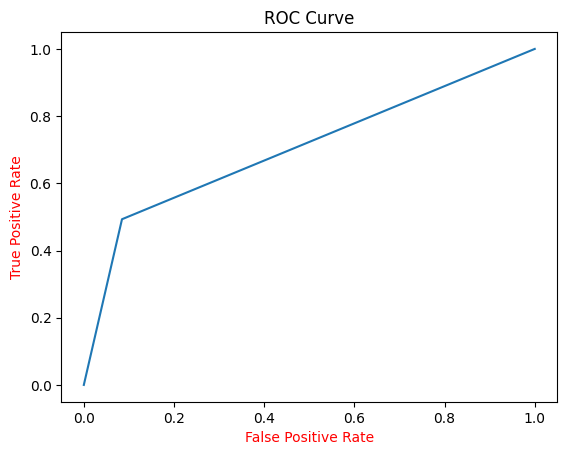

In [16]:
# Evaluate the performance of the model on the testing data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

# Evaluate the model on the testing data
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC score:", roc_auc_score(y_test, y_pred))

# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate",color="red")
plt.ylabel("True Positive Rate",color="red")
plt.title("ROC Curve")
plt.show()

# 5. Interpretation

In [17]:
#Interpret the coefficients of the logistic regression model
print("Coefficients:", log_reg.coef_)

Coefficients: [[-2.23762602e-03 -2.87935351e-01  3.09282923e-04 -1.70317574e+00
  -6.65221991e-04 -3.15235997e-01  2.65397944e-01 -4.46848170e-04
   5.54070082e-03  1.47020254e-02  2.68171774e-02  1.04032744e-01]]




```
#  The significance of each feature in predicting survival probability:

*  High significance
--> Pclass, Sex, Cabin

* Medium significance:
--> Age, Fare

* Low significance
-->Parch, SibSp, Ticket, Embarked

* No significance
--> PassengerId, Name

```



# **Interview Questions**

**1. What is the difference between precision and recall?**

**Precision:**

**Definition:** Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions.

**Interpretation:** High precision indicates that a model has a low false positive rate, meaning that when it predicts a positive class, it is likely correct.

**Recall:**

**Definition:** Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives. It measures the model's ability to identify all relevant instances.

**Interpretation:** High recall indicates that a model can capture most of the positive instances, meaning it has a low false negative rate.


---



**2. What is cross-validation, and why is it important in binary classification**

**DEF:** Cross-validation is a technique used to assess how well a machine learning model will perform on unseen data. It involves splitting the dataset into multiple subsets (or folds), training the model on some of these subsets, and testing it on the remaining ones. This process is repeated several times to ensure a reliable evaluation of the model's performance

**Why is it Important in Binary Classification?**

**Reliable Performance Evaluation:** It provides a better estimate of how the model will perform on new data compared to a single train-test split.

Mitigates Overfitting: **bold text** By training and testing on different subsets, it helps identify if the model is overfitting to the training data.

**Hyperparameter Tuning:** It allows for effective tuning of model parameters by evaluating different configurations across multiple data splits.

**Handles Class Imbalance:** Stratified cross-validation ensures that each fold has a representative distribution of classes, which is crucial in binary classification scenarios.



```
                                                                 SUBMITTED BY: VAMSI KRISHNA GOPIDESI
```

